In [1]:
# стандартные импорты
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=20)

In [2]:
# простая реализация без наследования
class Derivative:
    
    def __init__(self, f, h=1e-4):
        self.f = f
        self.h = float(h)
        
    def __call__(self, x):
        f, h = self.f, self.h
        
        return 1./(2.*h) * (f(x + h) - f(x - h))

In [3]:
# ... с наследованием: абстрактный базовый класс
class AbstractDerivative:
    
    def __init__(self, f, h):
        self.f = f
        self.h = float(h)
        self.maxStencilSize = 5
        self.coeffs = np.zeros(self.maxStencilSize)
        self._ConstructMethod()
        
        self.stencilPoints = np.array([self.h*i \
                                   for i in range(int(-(self.maxStencilSize - 1)/2), \
                                           int((self.maxStencilSize - 1)/2) + 1)])
  
    
    def _ConstructMethod(self):
        raise NotImplementedError
                                            
    def __call__(self, x):
        movedStencilPoints = self.stencilPoints + float(x)
                       
        value = 0.
        for i in range(self.maxStencilSize):
            value += self.coeffs[i]*self.f(movedStencilPoints[i])
        value /= self.h
        
        return value

In [4]:
# наследники
class DerivativeRight(AbstractDerivative):
        
    def _ConstructMethod(self):
        self.coeffs[2] = -1.
        self.coeffs[3] = 1.
        
class DerivativeCentral(AbstractDerivative):
    
    def _ConstructMethod(self):
        self.coeffs[1] = -1./2
        self.coeffs[3] = 1./2

In [5]:
# производная N-порядка
class DerivativeNthOrder:
    
    def __init__(self, f, n):
        dfdxn = f
        for i in range(n):
            dfdxn = DerivativeCentral(f=dfdxn, h=1e-4)
        
        self.dfdxn = dfdxn
        
    def __call__(self, x):
        return self.dfdxn(x)

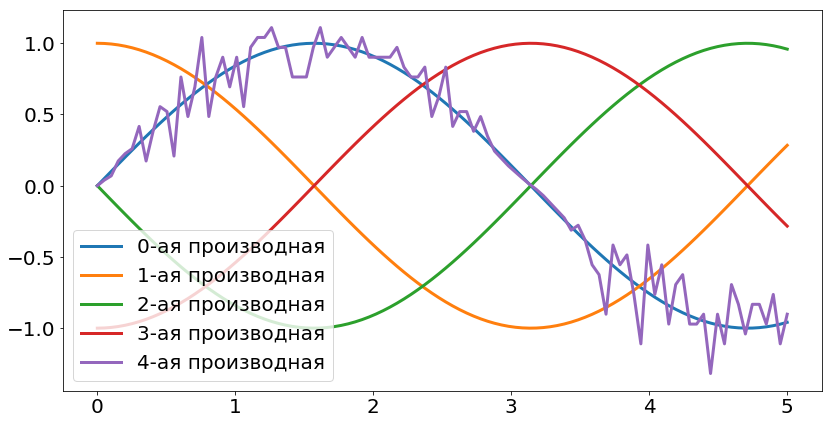

In [6]:
testFunc = lambda x: np.sin(x)


plt.figure(figsize=(13.6, 7))
xData = np.linspace(0, 5, 100)

for i in range(5):
    
    # метод "__call__" не сможет работать с векторным аргументом в данной реализации
    yData = [DerivativeNthOrder(testFunc, i)(x) for x in xData]
    
    plt.plot(xData, yData, lw=3, label=('%d-ая производная' % i ))

plt.legend(loc='best')
plt.show()